# Assignment for CLUSTERING AND FITTING

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

## Reading The Data

In [273]:
df = pd.read_csv('world-happiness-report.csv')

In [274]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [275]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [293]:
df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [279]:
df = df.dropna()

In [280]:
df.shape

(1708, 11)

## Statistical Analysis

In [281]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.064080,0.092064,0.010353,0.183068,0.253930,-0.035538,-0.098851,0.018465,0.205130
Life Ladder,0.064080,1.000000,0.792848,0.713211,0.754697,0.525089,0.182758,-0.448157,0.533092,-0.300466
Log GDP per capita,0.092064,0.792848,1.000000,0.705972,0.860345,0.353182,-0.024565,-0.343468,0.296473,-0.224806
Social support,0.010353,0.713211,0.705972,1.000000,0.617446,0.411719,0.056131,-0.226855,0.449969,-0.415358
Healthy life expectancy at birth,0.183068,0.754697,0.860345,0.617446,1.000000,0.384829,0.018188,-0.334990,0.318886,-0.143014
Freedom to make life choices,0.253930,0.525089,0.353182,0.411719,0.384829,1.000000,0.326313,-0.488072,0.611673,-0.267349
Generosity,-0.035538,0.182758,-0.024565,0.056131,0.018188,0.326313,1.000000,-0.288467,0.371530,-0.094401
Perceptions of corruption,-0.098851,-0.448157,-0.343468,-0.226855,-0.334990,-0.488072,-0.288467,1.000000,-0.301383,0.276518
Positive affect,0.018465,0.533092,0.296473,0.449969,0.318886,0.611673,0.371530,-0.301383,1.000000,-0.360361
Negative affect,0.205130,-0.300466,-0.224806,-0.415358,-0.143014,-0.267349,-0.094401,0.276518,-0.360361,1.000000


In [282]:
stats_df = df.describe().loc[['mean', 'std']]
skewness = df.skew()
kurt = df.kurtosis()
stats_df.loc['skewness'] = skewness
stats_df.loc['kurtosis'] = kurt
stats_df = stats_df.T
columns = {'mean':'Mean', 'std' : 'Standard Deviation', 'skewness' : 'Skewness', 'kurtosis': 'Kurtosis'}
stats_df = stats_df.rename(columns = columns)
stats_df

,Mean,Standard Deviation,Skewness,Kurtosis
year,2013.289227,4.073657,-0.093183,-1.114117
Life Ladder,5.446680,1.136592,0.100467,-0.739610
Log GDP per capita,9.321709,1.158344,-0.297663,-0.894544
Social support,0.810321,0.121638,-1.086312,1.041362
Healthy life expectancy at birth,63.225465,7.687011,-0.704205,-0.164171
Freedom to make life choices,0.739442,0.142846,-0.605016,-0.164643
Generosity,-0.000638,0.162103,0.795353,0.814872
Perceptions of corruption,0.750996,0.186028,-1.570646,2.116267
Positive affect,0.709550,0.108190,-0.358919,-0.608184
Negative affect,0.269446,0.083083,0.818455,1.083467


## Graphical Analysis 

In [283]:
def plot_top_five_countries_pie(data):
    """
    Creates a pie chart showing the distribution of Life Ladder scores among the top five countries.

    Parameters:
    - data (DataFrame): DataFrame containing the data with columns 'Country name' and 'Life Ladder'.

    Returns:
    - None
    """
    # Sort the data by Life Ladder scores
    sorted_data = data.sort_values(by='Life Ladder', ascending=False)

    # Select the top five countries
    top_five = sorted_data.head(5)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(top_five['Life Ladder'], labels=top_five['Country name'], autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Life Ladder Scores for Top Five Countries')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

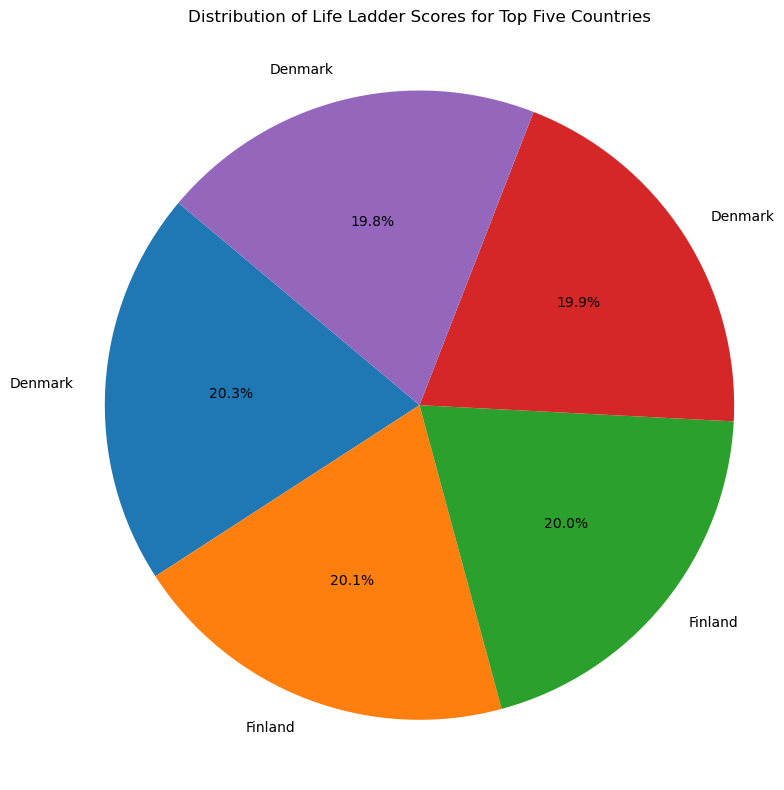

In [284]:
plot_top_five_countries_pie(df)

In [285]:
def heatmap(dataframe):
    """
    Visualize the correlation matrix of a DataFrame using a heatmap.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))
    sns.heatmap(dataframe.corr(), annot=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

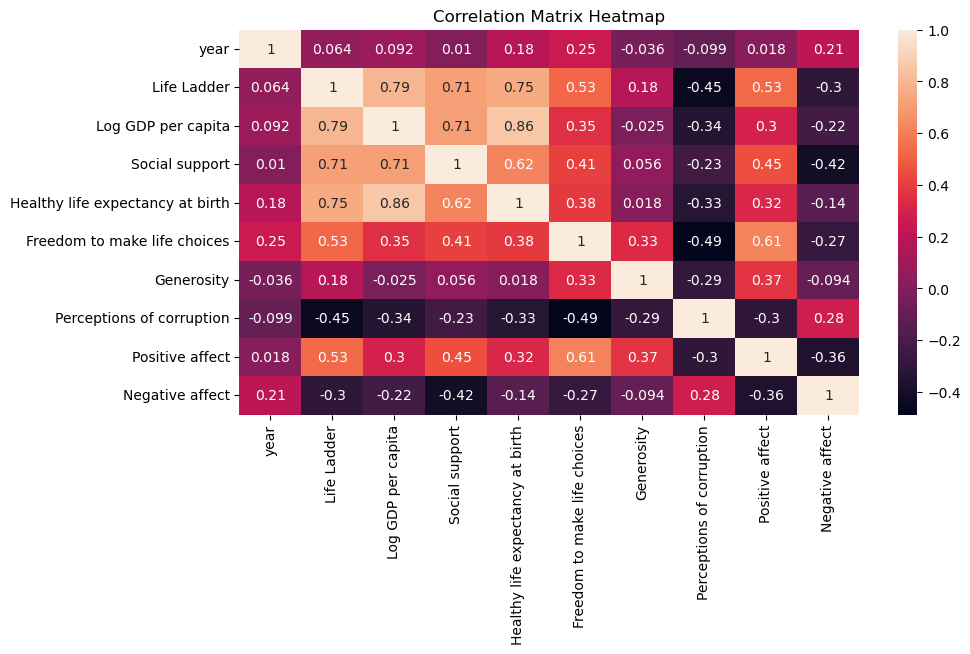

In [286]:
heatmap(df)

## Fitting

In [291]:
def fit_linear_regression(data):
    """
    Fit a linear regression model to analyze the relationship between
    a dependent variable and an independent variable with train-test split.

    Parameters:
    - dataset (DataFrame): The dataset containing the variables.
    - independent_var (str): The name of the independent variable.
    - dependent_var (str): The name of the dependent variable.
    - test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    - model (LinearRegression): Fitted linear regression model.
    - X_test (DataFrame): Independent variable values for the test data.
    - y_test (Series): Actual test values of the dependent variable.
    """

    # Split the dataset into training and testing sets
    X = data[independent_var]
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
    
    # Reshape X_train and X_test to 2D arrays
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

In [294]:
independent_var = 'Healthy life expectancy at birth' 
dependent_var = 'Life Ladder'  
# Fit linear regression model with train-test split for alchohol and quality
model, X_test, y_test = fit_linear_regression(df)

# Evaluate model performance
predictions = model.predict(X_test)
# Fit linear regression model with train-test split for alchohol and quality


In [295]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Model - Mean Squared Error:", mse)
print("Model - R-squared Score:", r2)

Model - Mean Squared Error: 0.42992016467164357
Model - R-squared Score: 0.5958474926442875


In [296]:
confidence = 0.95
n = len(X_test)
mean_x = np.mean(X_test)
t_value = 2.262  # for 95% confidence interval with n-2 degrees of freedom
se = np.sqrt(np.sum((y_test - predictions)**2) / (n - 2))
margin_of_error = t_value * se
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error


In [329]:
def plot_regression_results(X_test, y_test, predictions, margin_of_error):
    """
    Plot the results of a regression model, including actual vs. predicted values with confidence intervals.

    Parameters:
        X_test (array-like): The feature values for testing.
        y_test (array-like): The actual target values for testing.
        predictions (array-like): The predicted target values.
        margin_of_error (array-like): The margin of error for each prediction.

    Returns:
        None
    """
    # Convert arrays to numpy arrays if not already
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    predictions = np.array(predictions)
    margin_of_error = np.array(margin_of_error)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, color='green', label='Actual (CO(GT))', marker='o')  # Assuming X_test has multiple features
    plt.plot(X_test[:, 0], predictions, color='red', label='Predicted (CO(GT))', marker='x')
    plt.errorbar(X_test[:, 0], predictions, yerr=margin_of_error, fmt='o', color='blue', label='95% Confidence Intervals', capsize=4, elinewidth=0.5, capthick=0.5)
    plt.xlabel('Healthy life expectancy at birth')  # Assuming X_test has multiple features
    plt.ylabel('Life Ladder')
    plt.title('Fitted Regression Line with Confidence Intervals')
    plt.legend()
    plt.grid(True)

    plt.show()


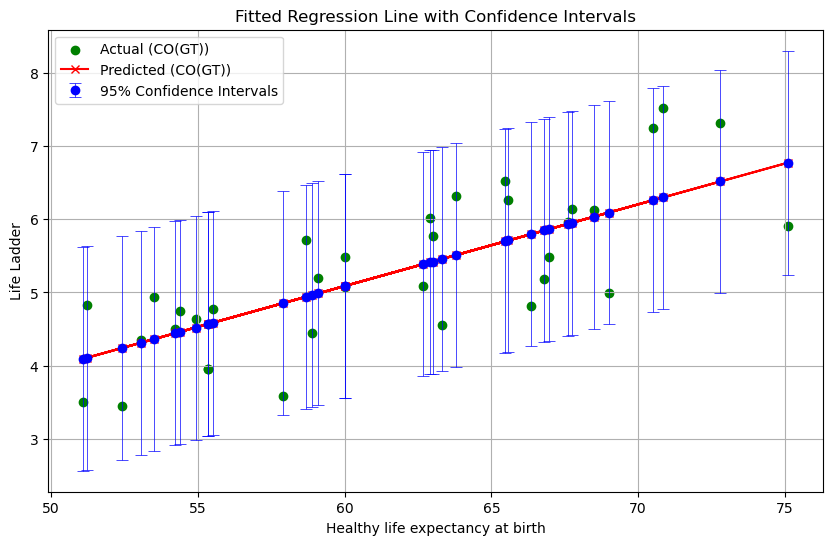

In [330]:
plot_regression_results(X_test, y_test, predictions, margin_of_error)

## Clustering

In [301]:
# Correlation Analysis
numeric_data = df.drop('Country name', axis = 1)


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

correlation_matrix = numeric_data.corr()
# Select variables with high correlation coefficient (> 0.5 or <-0.5)
high_corr_vars = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

print("Highly correlated variables:")
print(high_corr_vars)

Highly correlated variables:
                                  year  Life Ladder  Log GDP per capita  \
year                               1.0          NaN                 NaN   
Life Ladder                        NaN     1.000000            0.792848   
Log GDP per capita                 NaN     0.792848            1.000000   
Social support                     NaN     0.713211            0.705972   
Healthy life expectancy at birth   NaN     0.754697            0.860345   
Freedom to make life choices       NaN     0.525089                 NaN   
Generosity                         NaN          NaN                 NaN   
Perceptions of corruption          NaN          NaN                 NaN   
Positive affect                    NaN     0.533092                 NaN   
Negative affect                    NaN          NaN                 NaN   

                                  Social support  \
year                                         NaN   
Life Ladder                             0

In [319]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Set the number of components as per your requirement
pca.fit(scaled_data)
pca_components = pca.components_
print("PCA:")
print(pca_components)

PCA:
[[-0.55801114 -0.512064   -0.54483614 -0.359955  ]
 [ 0.3015298   0.05558806  0.2463525  -0.91940208]]


In [320]:
selected_columns = ['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices']
data = df[selected_columns]

# Normalize and back-scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, clusters))

# Based on the elbow curve or silhouette score, choose the optimal number of clusters
k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting at 2 clusters


In [321]:
def plot_elbow_curve_and_silhouette_scores(inertia, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores to find the optimal number of clusters.

    Parameters:
        inertia (list or array-like): List of inertia values for different numbers of clusters.
        silhouette_scores (list or array-like): List of silhouette scores for different numbers of clusters.

    Returns:
        None

    This function plots the elbow curve and silhouette scores to help determine the optimal number of clusters
    for a clustering algorithm. The elbow curve shows the inertia (within-cluster sum of squares) for different
    numbers of clusters, while the silhouette scores measure the compactness and separation of clusters.
    The optimal number of clusters is often identified as the point where the inertia starts to decrease
    at a slower rate (the "elbow" point) and the silhouette score is highest.
    """
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot inertia (elbow curve)
    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, 11), inertia, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Set plot title, ticks, and grid
    plt.title('Elbow Method for Optimal K')
    plt.xticks(range(2, 11))
    plt.grid(True)

    # Show the plot
    plt.show()



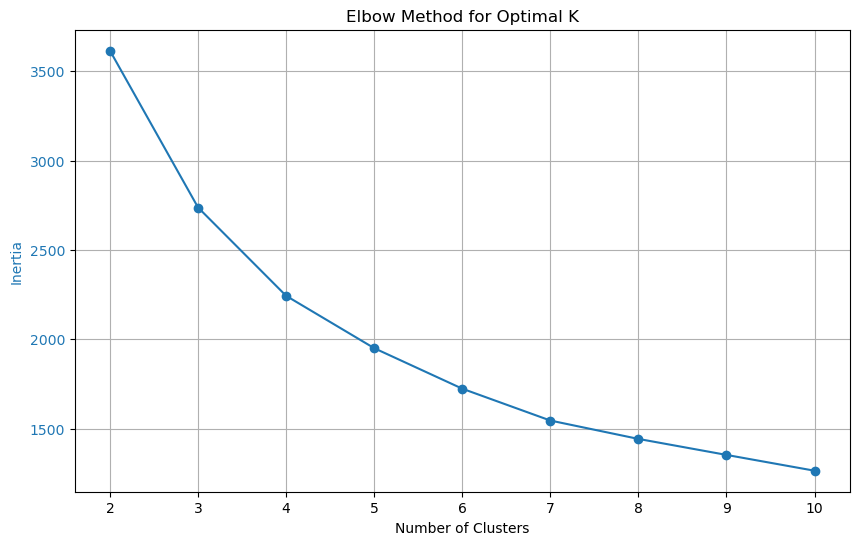

In [309]:
plot_elbow_curve_and_silhouette_scores(inertia, silhouette_scores)


In [322]:
def clustering(data, num_clusters):
    """
    Perform K-means Clustering on the given data.

    Parameters:
    - data (array-like): The input data for clustering.
    - num_clusters (int): The number of clusters to form.

    Returns:
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Inverse transform cluster centers to original feature space
    cluster_centers = scaler.inverse_transform(cluster_centers)
    
    return clusters, cluster_centers

In [323]:
def visualize(data, clusters, cluster_centers, kmeans):
    """
    Visualize the clusters along with predicted points.

    Parameters:
    - data (array-like): The original data.
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    - Agglomerative : Fitted KMeans model.
    """
    # Visualize original data points
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        cluster_data = data[clusters == cluster]
        plt.scatter(cluster_data[:, 1], cluster_data[:, 0], label=f'Cluster {cluster+1}', alpha=0.7)
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='o', color='red', label='Cluster Centers')
    # Predict and visualize additional points
    for center in cluster_centers:
        # Generate multiple random points around each cluster center
        for _ in range(5):
            random_index = np.random.randint(len(data))
            random_point = data[random_index] + np.random.randn(1, data.shape[1]) * 0.1
            cluster_label = kmeans.predict(random_point)[0]
            plt.scatter(random_point[:, 1], random_point[:, 0], marker='x', color='black')
    
    plt.xlabel('Log GDP per capita')
    plt.ylabel('Social support')
    plt.title('Clusters with Predicted Points')
    plt.legend()
    plt.grid(True)
    plt.savefig('cluster')
    plt.show()
    



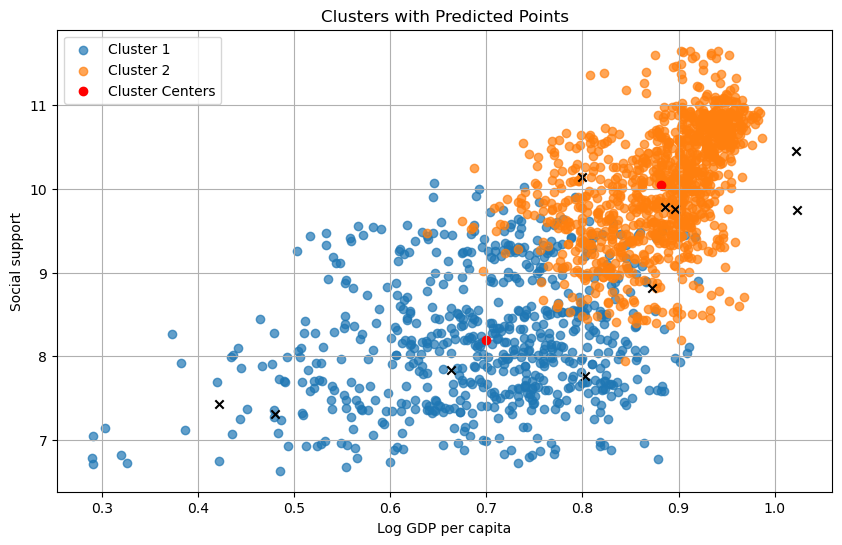

In [324]:

clusters, cluster_centers = clustering(data, k)
visualize(data.values, clusters, cluster_centers, kmeans)

In [318]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.41041305770181574


# Guided By:-Prof. William Cooper

# Submitted By:- Deepak Vishwakarma

# Student ID:- 23035559